In [1]:
Tifpath = 'StageGMM4_2020_SA4CD/Data/Paracou_125MHz/geo5Md3iHV_t4-7_NCI7_lkLcl3-5-t7_lkRgn9-15.tif'

import numpy as np

import matplotlib.pyplot as plt

from osgeo import gdal
from scipy import fftpack





In [20]:
def TFct(Son,N):
    rec = N/8
    H=np.hanning(N)
    NS=len(Son)
    Nf=int(NS*1/rec)-7
    TF=np.zeros((N,Nf), dtype = complex)
    for i in range(Nf):
        TF[:,i]=fftpack.fft(H*(Son[int(i*rec):int(i*rec+N)]))
    return TF

4.8664274
(1866, 1193)


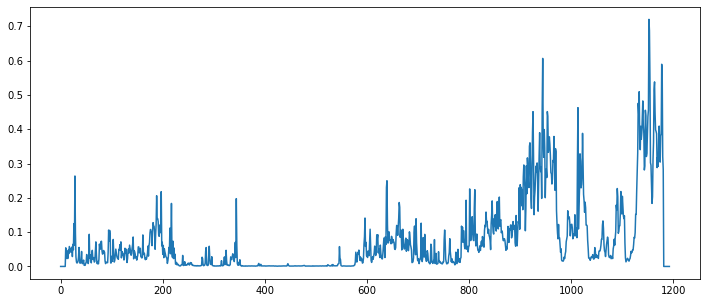

4


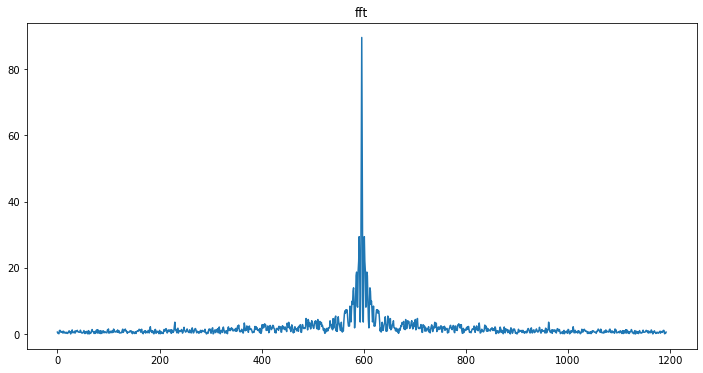

In [22]:
gdal.UseExceptions()
ds = gdal.Open(Tifpath)
ds_band1 = np.array(ds.GetRasterBand(1).ReadAsArray())
ds_band2 = np.array(ds.GetRasterBand(2).ReadAsArray())
ds_band3 = np.array(ds.GetRasterBand(3).ReadAsArray())
ds_band4 = np.array(ds.GetRasterBand(4).ReadAsArray())
print(np.max(ds_band1)) 
snippet1 = ds_band1[10,:]

print(ds_band1.shape)
plt.figure(figsize=(12,5))
plt.plot(snippet1)
plt.show()
print(ds.RasterCount)
fft_snippet1 = np.abs(fftpack.fft(snippet1))

plt.figure(figsize=(12,6))
plt.plot(fftpack.fftshift(fft_snippet1))
plt.title("fft")
plt.show()


<ipython-input-19-c11348deed12>:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(10*np.log(ds_band1)).set_cmap("gray")


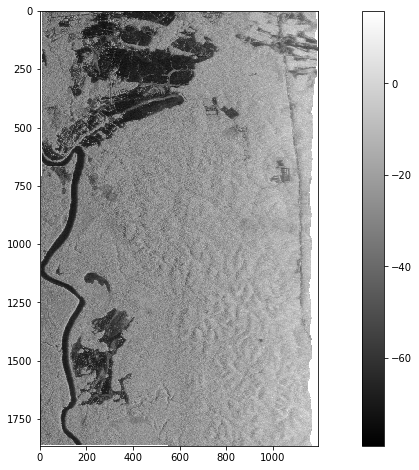

<ipython-input-19-c11348deed12>:6: RuntimeWarning: divide by zero encountered in log
  plt.imshow(10*np.log(ds_band2))


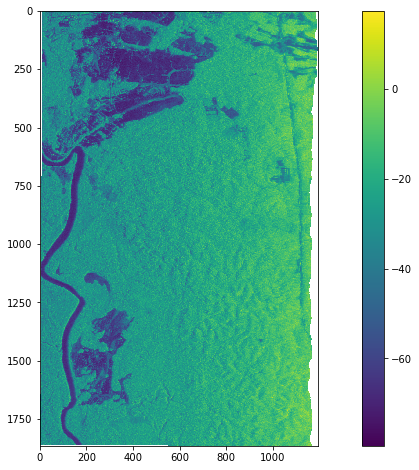

<ipython-input-19-c11348deed12>:10: RuntimeWarning: divide by zero encountered in log
  plt.imshow(10*np.log(ds_band3))


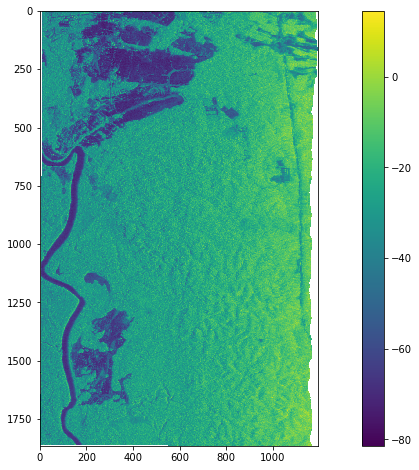

<ipython-input-19-c11348deed12>:14: RuntimeWarning: divide by zero encountered in log
  plt.imshow(10*np.log(ds_band4))


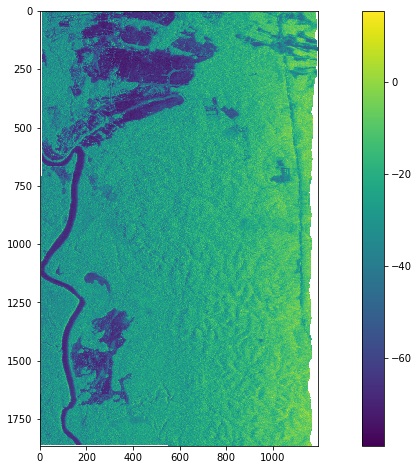

In [19]:
plt.figure(figsize=(16,8))
plt.imshow(10*np.log(ds_band1)).set_cmap("gray")
plt.colorbar()
plt.show()
plt.figure(figsize=(16,8))
plt.imshow(10*np.log(ds_band2))
plt.colorbar()
plt.show()
plt.figure(figsize=(16,8))
plt.imshow(10*np.log(ds_band3))
plt.colorbar()
plt.show()
plt.figure(figsize=(16,8))
plt.imshow(10*np.log(ds_band4))
plt.colorbar()
plt.show()
 
 

